In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')

df_train.head()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

--- Missing Data (Sorted) ---
              Total Missing  Percent Missing (%)
PoolQC                 1453            99.520548
MiscFeature            1406            96.301370
Alley                  1369            93.767123
Fence                  1179            80.753425
MasVnrType              872            59.726027
FireplaceQu             690            47.260274
LotFrontage             259            17.739726
GarageType               81             5.547945
GarageYrBlt              81             5.547945
GarageFinish             81             5.547945
GarageQual               81             5.547945
GarageCond               81             5.547945
BsmtExposure             38             2.602740
BsmtFinType2             38             2.602740
BsmtQual                 37             2.534247
BsmtCond                 37             2.534247
BsmtFinType1             37             2.534247
MasVnrArea                8             0.547945
Electrical                1            

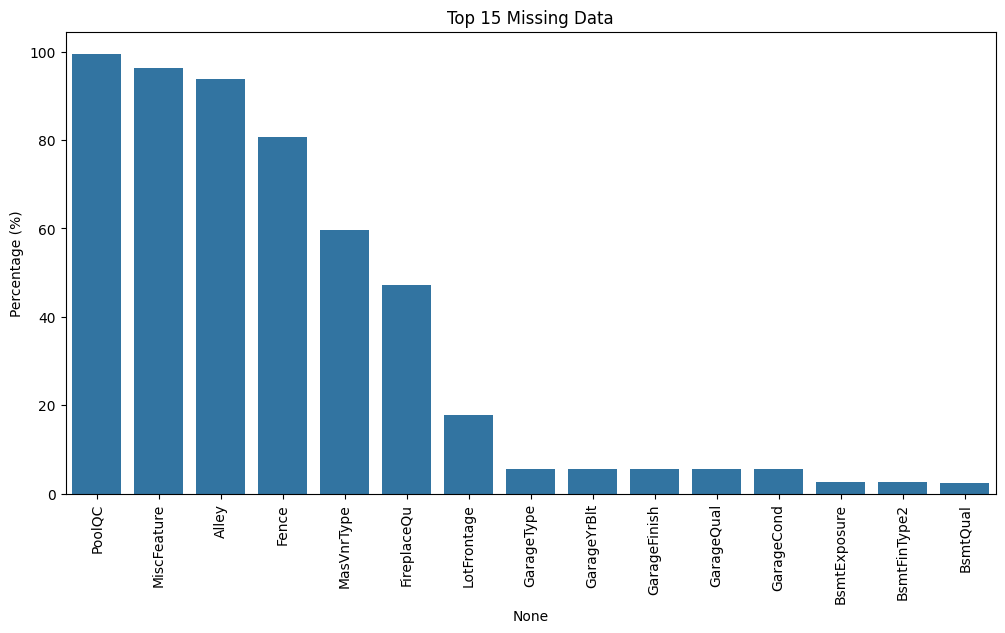

In [3]:
total_missing = df_train.isnull().sum()
percent_missing = (df_train.isnull().sum() / len(df_train)) * 100

missing_data_info = pd.DataFrame({
    'Total Missing': total_missing,
    'Percent Missing (%)': percent_missing
})
missing_data_sorted = missing_data_info[missing_data_info['Total Missing'] > 0].sort_values(
    by='Total Missing', ascending=False
)

print("--- Missing Data (Sorted) ---")
print(missing_data_sorted)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=missing_data_sorted.index[:15],
    y=missing_data_sorted['Percent Missing (%)'][:15]
)
plt.xticks(rotation=90)
plt.title('Top 15 Missing Data')
plt.ylabel('Percentage (%)')
plt.show()

In [4]:
df_cleaned = df_train.copy()

cols_fill_none = [
    'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'MasVnrType'
]

for col in cols_fill_none:
    df_cleaned[col] = df_cleaned[col].fillna('None')

cols_fill_zero = [
    'MasVnrArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    'BsmtFullBath', 'BsmtHalfBath',
    'GarageCars', 'GarageArea'
]

for col in cols_fill_zero:
    df_cleaned[col] = df_cleaned[col].fillna(0)

print("--- Missing Values After Inputation ---")

total_missing = df_cleaned.isnull().sum()
missing_data_info = pd.DataFrame({
    'Total Missing': total_missing
})
missing_data_sorted = missing_data_info[missing_data_info['Total Missing'] > 0].sort_values(
    by='Total Missing', ascending=False
)

print(missing_data_sorted)

--- Missing Values After Inputation ---
             Total Missing
LotFrontage            259
GarageYrBlt             81
Electrical               1


In [5]:
electrical_mode = df_cleaned['Electrical'].mode()[0]
df_cleaned['Electrical'] = df_cleaned['Electrical'].fillna(electrical_mode)

df_cleaned['GarageYrBlt'] = df_cleaned['GarageYrBlt'].fillna(0)

df_cleaned['LotFrontage'] = df_cleaned.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

Exploratory Data Analysis

In [6]:
print(df_cleaned['SalePrice'].describe())
print('Skewness: ', df_cleaned['SalePrice'].skew())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Skewness:  1.8828757597682129


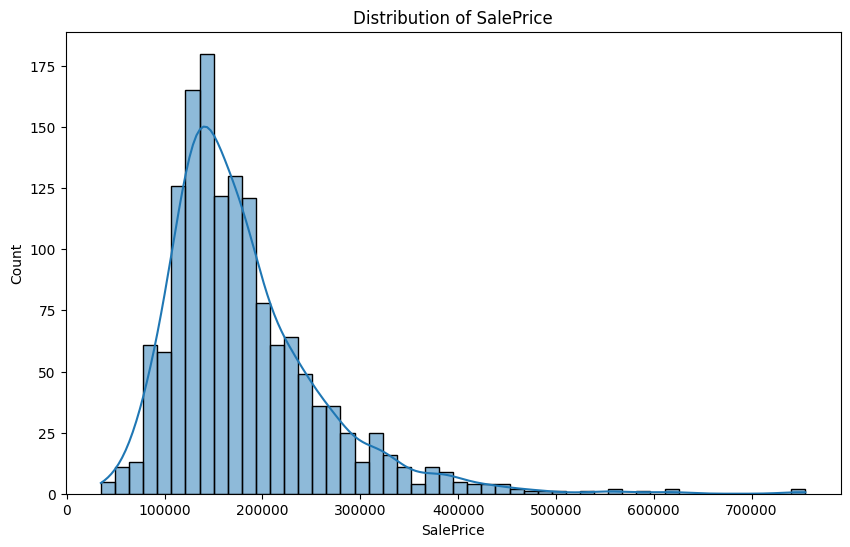

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['SalePrice'], kde=True, bins=50)
plt.title('Distribution of SalePrice')
plt.show()

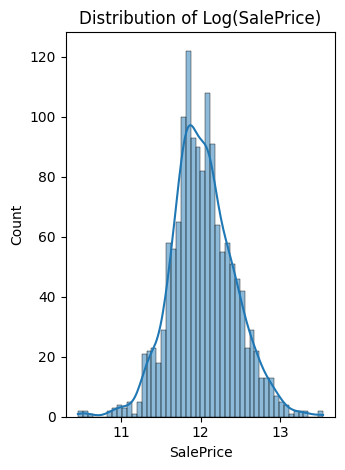

In [8]:
plt.subplot(1,2,2)
sns.histplot(np.log1p(df_cleaned['SalePrice']), kde=True, bins=50)
plt.title('Distribution of Log(SalePrice)')
plt.tight_layout()
plt.show()

In [9]:
df_cleaned['SalePrice_log'] = np.log1p(df_cleaned['SalePrice'])
corr_matrix = df_cleaned.corr(numeric_only=True)
corr_matrix_sorted = corr_matrix['SalePrice_log'].sort_values(ascending=False)
print(corr_matrix_sorted.head(10))

SalePrice_log    1.000000
SalePrice        0.948374
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
Name: SalePrice_log, dtype: float64


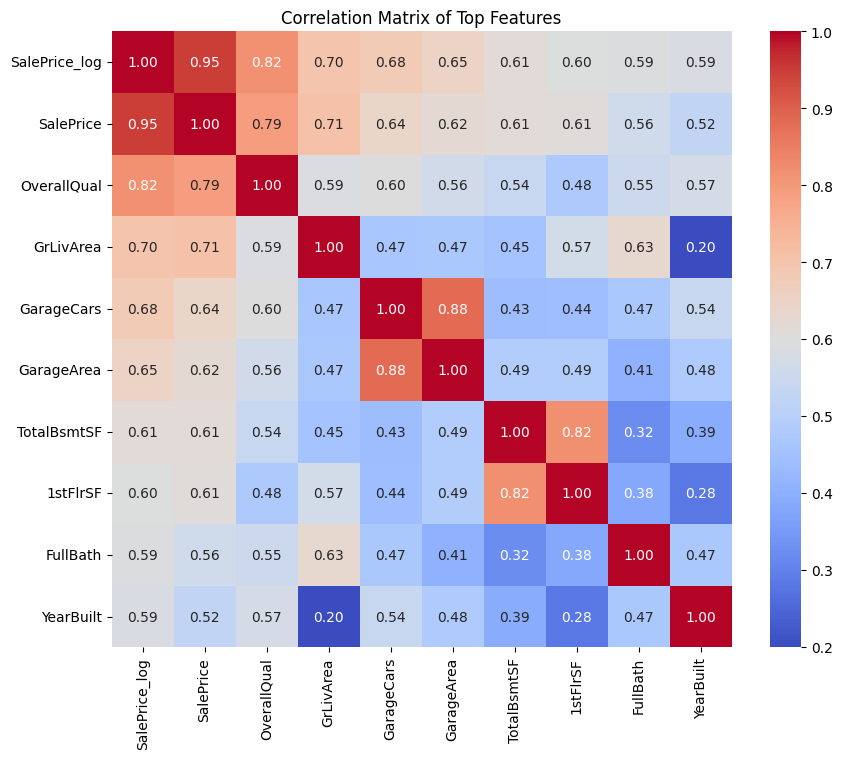

In [10]:
top_features = corr_matrix_sorted.head(10).index
top_matrix = df_cleaned[top_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(top_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Top Features')
plt.show()

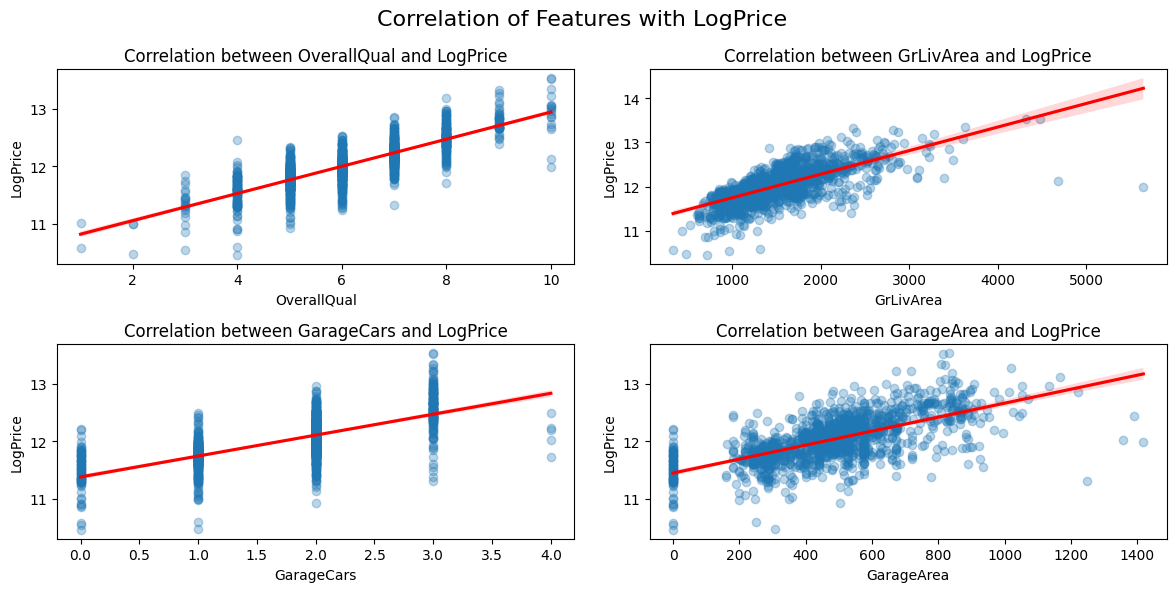

In [11]:
features_plot = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']
plt.figure(figsize=(12, 6))
plt.suptitle('Correlation of Features with LogPrice', fontsize=16)
for i, feature in enumerate(features_plot):
    plt.subplot(2, 2, i+1)
    sns.regplot(x=df_cleaned[feature], y=df_cleaned['SalePrice_log'], scatter_kws= {'alpha':0.3}, line_kws = {'color':'red'})
    plt.title(f'Correlation between {feature} and LogPrice')
    plt.xlabel(feature)
    plt.ylabel('LogPrice')
plt.tight_layout()
plt.show()

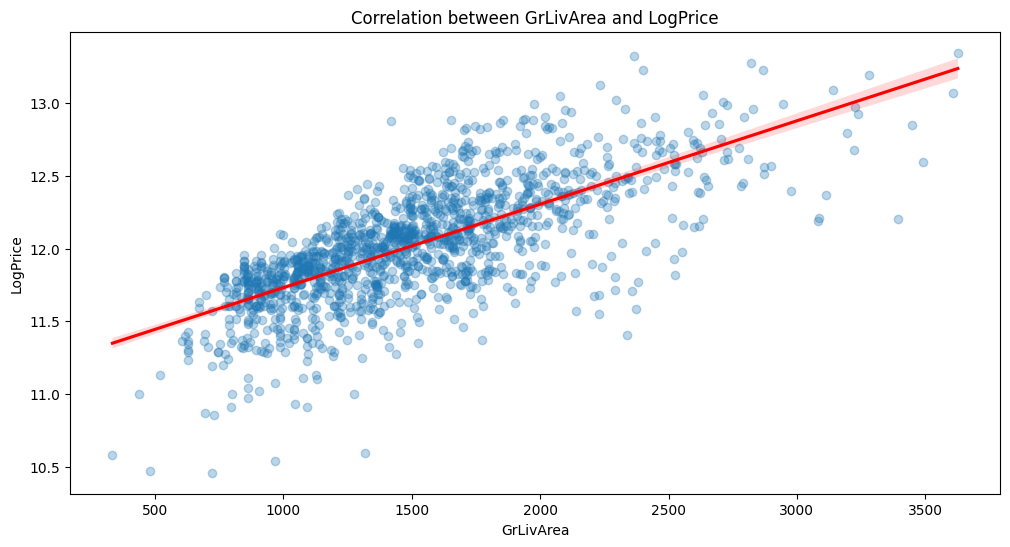

In [12]:
outliers = df_cleaned[(df_cleaned['GrLivArea'] > 4000)].index
df_cleaned = df_cleaned.drop(outliers)
plt.figure(figsize=(12, 6))
sns.regplot(x=df_cleaned['GrLivArea'], y=df_cleaned['SalePrice_log'], scatter_kws= {'alpha':0.3}, line_kws = {'color':'red'})
plt.title('Correlation between GrLivArea and LogPrice')
plt.xlabel('GrLivArea')
plt.ylabel('LogPrice')
plt.show()

In [13]:
df_final = pd.get_dummies(df_cleaned)
df_final.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_final.drop(['SalePrice_log','SalePrice'], axis=1)
y = df_final['SalePrice_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1164, 302), (292, 302))

In [15]:
scaler = StandardScaler()

X_train_id = X_train['Id']
X_test_id = X_test['Id']
X_train = X_train.drop('Id', axis=1)
X_test = X_test.drop('Id', axis=1)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred_log = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_log))
print(f'Root Mean Squared Error: {rmse}')

rmse_dollars = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred_log)))
print(f'Root Mean Squared Error in Dollars: {rmse_dollars}')

Root Mean Squared Error: 0.1299603098898471
Root Mean Squared Error in Dollars: 20866.68816332644


Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Root Mean Squared Error (Random Forest): {rmse_rf}')

rmse_dollars_rf = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred_rf)))
print(f'Root Mean Squared Error in Dollars (Random Forest): {rmse_dollars_rf}')

Root Mean Squared Error (Random Forest): 0.14883412176314173
Root Mean Squared Error in Dollars (Random Forest): 25560.568626355845


In [17]:
feature_names = X_train.columns

coefficients = pd.DataFrame(model.coef_, index = feature_names, columns = ['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending = False)
coefficients.head(10)

,Coefficient
GrLivArea,0.069720
YearBuilt,0.060502
PoolArea,0.058539
OverallQual,0.049185
2ndFlrSF,0.047916
OverallCond,0.042409
TotalBsmtSF,0.037809
1stFlrSF,0.036111
SaleType_New,0.034917
LotArea,0.033688


In [18]:
coefficients.tail(10)

,Coefficient
GarageCond_None,-0.019696
GarageQual_None,-0.019696
Condition2_RRAe,-0.021211
Exterior2nd_MetalSd,-0.021736
LandSlope_Sev,-0.022059
MSSubClass,-0.022674
SaleType_WD,-0.024649
SaleCondition_Partial,-0.027003
MSZoning_C (all),-0.029761
GarageYrBlt,-0.085412
